# 📊 Fase 3 – Entrenamiento de Modelo ML

## 🎯 Objetivo
Construir un clasificador capaz de diferenciar entre tráfico **normal** y **sospechoso** en redes monitoreadas, como parte del sistema modular de CiberVigIA.

## 🧠 Algoritmos sugeridos
- **Random Forest**: Alta precisión en contextos de ciberseguridad, robusto ante ruido.
- **KNN optimizado**: Implementación rápida, útil como baseline comparativo.

## ⚙️ Pasos técnicos

1. **Preparación del dataset**
   - División en conjunto de entrenamiento y prueba (80/20).
   - Separación de variables predictoras (`X`) y etiqueta (`y`).

2. **Entrenamiento del modelo**
 
   ```python
   from sklearn.ensemble import RandomForestClassifier
   from sklearn.model_selection import train_test_split
   from sklearn.metrics import accuracy_score

   X = df.drop("label", axis=1)
   y = df["label"]

   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

   clf = RandomForestClassifier(n_estimators=100)
   clf.fit(X_train, y_train)

   preds = clf.predict(X_test)
   print("Accuracy:", accuracy_score(y_test, preds))
   ```
   
4. **Persistencia del modelo**
    - Guardar el modelo entrenado para futuras fases (detección en tiempo real, despliegue).


   ```python
    import joblib
    joblib.dump(clf, "modelo_rf.pkl")
   ```

## 📦 Entregable

Modelo entrenado con al menos **85% de accuracy** sobre el conjunto de prueba. Se recomienda documentar hiperparámetros, métricas adicionales (precision, recall, F1) y posibles ajustes para mejorar el rendimiento.

> 💡 *Nota técnica: Para datasets desbalanceados, considera aplicar técnicas como SMOTE antes del entrenamiento. Esto puede mejorar la capacidad del modelo para detectar tráfico sospechoso minoritario.*

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib

### Paso 1: Cargar datasets preprocesados

In [3]:
df_kdd = pd.read_csv('../../data/processed/nsl_kdd_clean.csv')
df_cic = pd.read_csv('../../data/processed/cic_ids2017_clean.csv')

### Función para entrenar y validar (reusable para ambos datasets)

In [4]:
def train_and_validate(df, label_col='Label', model_type='rf', n_estimators=100, n_neighbors=5):
    # 2. Dividir en X/y y train/test (80/20)
    X = df.drop(label_col, axis=1)
    y = df[label_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Forma train/test:", X_train.shape, X_test.shape)

    # 3. Elegir y entrenar modelo
    if model_type == 'rf':
        clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    elif model_type == 'knn':
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    else:
        raise ValueError("Modelo no soportado: usa 'rf' o 'knn'")

    clf.fit(X_train, y_train)
    print("Modelo entrenado.")

    # 4. Predecir y validar métricas
    preds = clf.predict(X_test)
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='weighted')
    rec = recall_score(y_test, preds, average='weighted')
    f1 = f1_score(y_test, preds, average='weighted')
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")

    # Confusion Matrix visual
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

    # 5. Cross-validation (para robustez)
    cv_scores = cross_val_score(clf, X, y, cv=5, n_jobs=-1)
    print("Cross-val scores:", cv_scores, "Mean:", cv_scores.mean())

    return clf

### Entrenar para NSL-KDD

In [5]:
print(df_kdd.columns.tolist())

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Label']


Forma train/test: (1159747, 41) (289937, 41)
Modelo entrenado.
Accuracy: 0.9997, Precision: 0.9997, Recall: 0.9997, F1: 0.9997


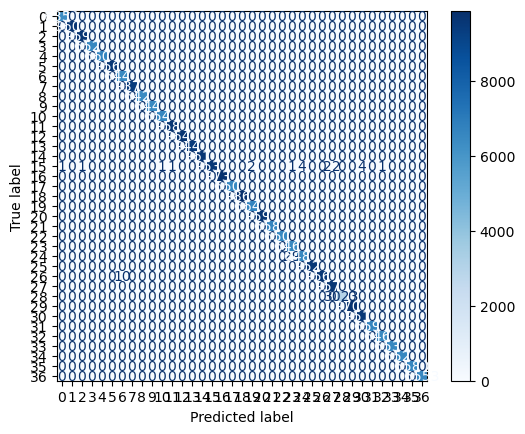

Cross-val scores: [0.99949989 0.99971718 0.99961716 0.99961026 0.99782711] Mean: 0.9992543192673626


In [6]:
clf_kdd_rf = train_and_validate(df_kdd, model_type='rf')

Forma train/test: (1159747, 41) (289937, 41)
Modelo entrenado.


Exception ignored in: <function ResourceTracker.__del__ at 0x104179bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x102501bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1102edbc0>
Traceback (most recent call last

Accuracy: 0.9993, Precision: 0.9993, Recall: 0.9993, F1: 0.9993


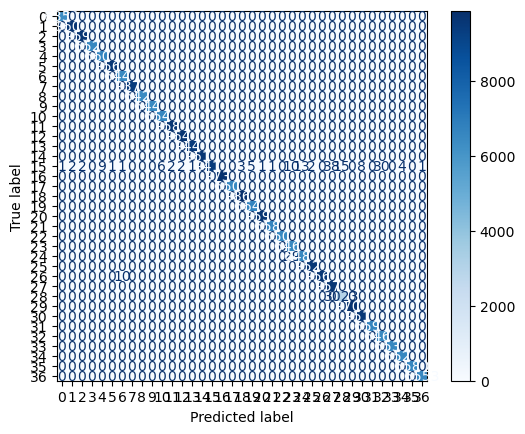

Exception ignored in: <function ResourceTracker.__del__ at 0x106eb5bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x102d81bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x106371bc0>
Traceback (most recent call last

Cross-val scores: [0.99897909 0.99946195 0.99921017 0.99908256 0.99773743] Mean: 0.9988942409816145


In [7]:
clf_kdd_knn = train_and_validate(df_kdd, model_type='knn')

Forma train/test: (5417230, 78) (1354308, 78)


Exception ignored in: <function ResourceTracker.__del__ at 0x10251dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x103921bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x104ae5bc0>
Traceback (most recent call last

Modelo entrenado.
Accuracy: 0.9993, Precision: 0.9993, Recall: 0.9993, F1: 0.9993


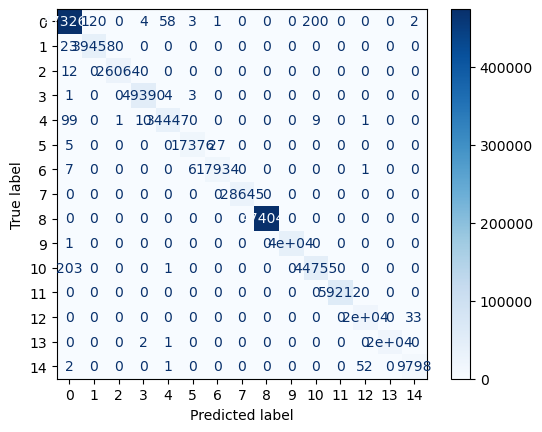

In [ ]:
clf_cic_rf = train_and_validate(df_cic, model_type='rf')

In [ ]:
clf_cic_knn = train_and_validate(df_cic, model_type='knn')